# Week 02 Assignment glucose level data


Missing data occurs commonly in many data applications. Especially wearable sensor devices encounter measurement errors resulting in missing data. Although pandas can handle missing data, for instance, to exclude missing data in the descriptive analysis, we might decide to reshape our data to improve quality. We might consider excluding certain rows, columns, or decide to impute our data if we take an argumentative approach. This week we will work with sensor data of a semester 01 project. The data is timeseries related but a lot of sensor errors occurred. First, we inspect the quality data. Then we will work with imputation, interpolation, and smoothing techniques to overcome this issue of the error readings. Finaly we plot the data. Visualization is a method to translate data into information. As a data scientist you should be able to choose an appropiate visualizations. 


Keywords: data loading, data inspection, data exploration, data cleaning, impute data, missing data, timeseries, pandas, visualization, interactive plots, overflow/underflow error

More to read
- https://fennaf.gitbook.io/bfvm22prog1/
- https://towardsdatascience.com/how-to-analyze-blood-glucose-data-with-python-data-science-packages-4f160f9564be


More about pandas and bokeh programming
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
- https://rubberduckdebugging.com/
- https://docs.bokeh.org/en/latest/docs/gallery.html


Learning objectives

- Further practice numpy / pandas
- Read, inspect, clean, and impute JSON data. Handle missing data
- Apply different interpolation/smoothing techniques
- Recognize overflow/underflow error
- Perform visual and statistical analysis for time series data
- Maintain development environment 
- Apply coding standards and FAIR principles


Note: you can bring your own sensor data, but for the practical you need some missing data points. 

By the end of this week the student can:

- load a json dataset 
- typecast the Pandas DataFrame to appropiate data types
- inspect the dataset for quality and metadata information
- add a column with interpolated data in Pandas DataFrame
- perform visual analysis

please add your own topics you want to learn here: https://padlet.com/ffeenstra1/69vbvy0l8t32rq55


The assignment consists of 6 parts:

- [part 1: load the data](#0)
     - [Exercise 1.1](#ex-11)
- [part 2: prepare for inspection](#1)
     - [Exercise 2.1](#ex-21)
- [part 3: inspect the data](#2)
     - [Exercise 3.1](#ex-31)
- [part 4: interpolate the data](#3)
     - [Exercise 4.1](#ex-41)
- [part 5: visualize the data](#4)
     - [Exercise 5.1](#ex-51)
- [part 6: Challenge](#5)
     - [Exercise 6.1](#ex-61)

Part 1 and 5 are mandatory, part 6 is optional (bonus)
Mind you that you cannot copy code without referencing the code. If you copy code you need to be able to explain your code verbally and you will not get the full score. 


<a name='0'></a>
## Part 1: Load the data

Instructions: Load the json datafile `glucose.json` into a pandas dataframe. Check your dataframe with a `.head()` to compare with the expected outcome. 

Preferably we read the data not with a hard coded data path but using a config file. See https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>json.load() method reads a file, pd.read_json converts it to a Pandas DataFrame</li>
    <li>when loading into a Pandas DataFrame use records orientation </li>
</ul>
</details>

<a name='ex-11'></a>
### Code your solution

In [1]:
import pandas as pd
import json as jsn
import panel as pn
import yaml

In [2]:
def configReader(config_path):
    """
    This function opens config.yaml file 
    and fetches the file's data.
    input: configue file path
    output: configue file
    """
    with open(config_path, "r") as file:
        config = yaml.safe_load(file)
    return config

In [3]:
# Parsing the config file.
config = configReader("../config.yaml")
glucose = config['glucose']

In [4]:
# Loading the json file from config.
glucose_jsn = jsn.load(open(glucose))

# Creating a DataFrame from the json file.
glucose_df = pd.read_json(glucose_jsn)
print(glucose_df.head())

       ID              time  recordtype glucose
0  2845.0  2019-04-25 00:08           1     109
1  2850.0  2019-04-25 00:50           1        
2  2877.0  2019-04-25 07:02           1     123
3  2881.0  2019-04-25 07:34           1     158
4  2886.0  2019-04-25 08:19           1        


In [5]:
# Inspecting the DataFrame.
print(f"Shape:\n{glucose_df.shape}")
print(f"\nColumns:\n{glucose_df.columns}")
print(f"\nData Types:\n{glucose_df.dtypes}")

Shape:
(136, 4)

Columns:
Index(['ID', 'time', 'recordtype', 'glucose'], dtype='object')

Data Types:
ID            float64
time           object
recordtype      int64
glucose        object
dtype: object


#### Expected outcome: 

<a name='1'></a>
## Part 2: Prepare the data

Check the datatypes of your dataframe.
- The `glucose` field should be an integer.
- the `time` field should have a datetime format.
- If the datatypes are different you should typecast them to the right format.
- Make sure that your dataset is sorted by the time column.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use astype() method or pandas.DataFrame.to_datetime() for instance</li>
    <li>make sure that the empty spaces are filled with NaN. Use errors='coerce'</li>
    <li>set_index(), sort_index() and reset_index() are helpful to sort on index</li>
</ul>
</details>

<a name='ex-21'></a>
### Code your solution

In [11]:
# Typecasting the 'time' column to datetime.
glucose_df['time'] = pd.to_datetime(glucose_df['time'])

# Typecasting the 'glucose' column to integer.
# glucose_df['glucose'] = glucose_df['glucose'].astype(int, errors='ignore')
glucose_df['glucose'] = pd.to_numeric(glucose_df['glucose'], errors='coerce').astype('float')

# Typecasting the 'ID' column to integer.
glucose_df['ID'] = glucose_df['ID'].astype('Int64')

print(f"\nData Types:\n{glucose_df.dtypes}")


Data Types:
ID                     Int64
time          datetime64[ns]
recordtype             int64
glucose              float64
dtype: object


In [12]:
# Creating a copy of the DataFrame.
ndf_glucose = glucose_df.copy()

# Sorting the DataFrame by 'time'.
ndf_glucose = ndf_glucose[['time'] + [col for col in ndf_glucose.columns if col != 'time']]
ndf_glucose = ndf_glucose.sort_values(by='time').reset_index(drop=True)
ndf_glucose

,time,ID,recordtype,glucose
0,2019-04-25 00:08:00,2845,1,109.0
1,2019-04-25 00:14:00,-2147483648,0,NaN
2,2019-04-25 00:29:00,-2147483648,0,NaN
3,2019-04-25 00:44:00,-2147483648,0,NaN
4,2019-04-25 00:50:00,2850,1,NaN
...,...,...,...,...
131,2019-04-25 23:02:00,-2147483648,0,NaN
132,2019-04-25 23:18:00,-2147483648,0,NaN
133,2019-04-25 23:31:00,3062,1,111.0
134,2019-04-25 23:33:00,-2147483648,0,NaN


#### Expected outcome: 

<a name='2'></a>
## Part 3: Inspect the data

Now that we prepared the data we are going to inspect the data to get more familiar with the data. You can answer the questions below but feel free to explore the data further by plotting and or statistics, group by overviews and so on. 

To be answered at least:
- what is the quantity of the data (observations and features)
- what is the percentage missing data for glucose?
- is there a specific pattern for glucose value and recordtype?
- what is the time range?

Code the solutions to your answers. Create meaningful overviews or statistics

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>In the week 01 assignment some functions were explained to inspect missing values</li>
    <li>In the week 01 assignment some functions were explained to groupby value</li>
</ul>
</details>

<a name='ex-31'></a>
### Code your solution

In [21]:
# Inspecting the DataFrame.
num_cols = ndf_glucose.select_dtypes(include=['number'])
print(f"Basic statistical summaries of numerical columns:\n{num_cols.describe()}")

Basic statistical summaries of numerical columns:
                      ID  recordtype     glucose
count              136.0  136.000000   52.000000
mean  -1294805138.029412    0.397059  123.403846
std    1054624688.474743    0.491097   20.734796
min        -2147483648.0    0.000000   86.000000
25%        -2147483648.0    0.000000  109.750000
50%        -2147483648.0    0.000000  121.500000
75%               2949.5    1.000000  129.000000
max               3062.0    1.000000  184.000000


In [35]:
# Checking for missing values.
print(f"Missing values:\n{ndf_glucose.isnull().sum()}")

# Percentage of missing values.
print(f"\nPercentage of missing values:\n{ndf_glucose.isnull().mean() * 100}")

# Checking for duplicates.
print(f"\nNumber of duplicates: ({ndf_glucose.duplicated().sum()})")

Missing values:
time           0
ID             0
recordtype     0
glucose       84
dtype: int64

Percentage of missing values:
time           0.000000
ID             0.000000
recordtype     0.000000
glucose       61.764706
dtype: float64

Number of duplicates: (0)


In [42]:
# checking for unique values in the 'ID' column.
print(f"Unique values:\n{ndf_glucose['ID'].unique()}")

Unique values:
<IntegerArray>
[       2845, -2147483648,        2850,        2877,        2881,        2886,
        2899,        2909,        2916,        2922,        2925,        2927,
        2929,        2932,        2935,        2937,        2940,        2942,
        2944,        2947,        2949,        2951,        2954,        2957,
        2960,        2969,        2971,        2974,        2976,        2979,
        2981,        2983,        2985,        2987,        2990,        2992,
        2994,        2996,        2999,        3001,        3003,        3005,
        3008,        3010,        3012,        3026,        3029,        3031,
        3034,        3043,        3047,        3050,        3055,        3058,
        3062]
Length: 55, dtype: Int64


The percentage of missing glucose data is 0.6176470588235294

time range for this experiment is 0 days 23:40:00

it seems that there is 0 for recordtype 0
it seems that there is 52 for recordtype 1
            time  ID  glucose
recordtype                   
0             82  82        0
1             54  54       52

it seems that there is just on minus ID for recordtype 0
                        time  glucose
recordtype ID                        
0          -2147483648    82        0
1           2845           1        1
            2850           1        0
            2877           1        1
            2881           1        1

this plot presents what if null data erase from the dataset


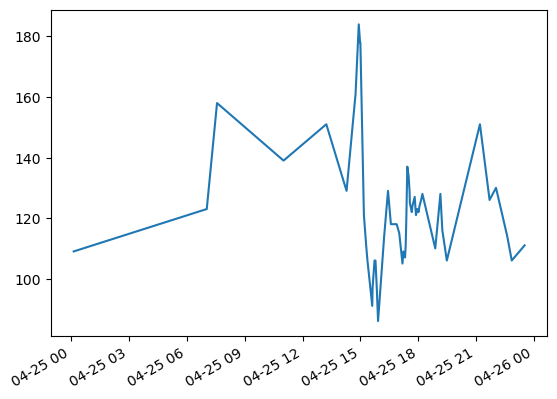

In [5]:

#pecentage of data missing for glucose
nullFinder = df.isnull().sum()
NullPerc = nullFinder['glucose']/len(df['glucose'])
print(f'The percentage of missing glucose data is {NullPerc}\n')

# time range
timeRange = df['time'].max() - df['time'].min()
print(f'time range for this experiment is {timeRange}\n')

#divide based on record type
recordType = pd.DataFrame(df.groupby(['recordtype']).count())
glocuseData = recordType['glucose']
print(f'it seems that there is {glocuseData[0]} for recordtype {recordType.index[0]}')
print(f'it seems that there is {glocuseData[1]} for recordtype {recordType.index[1]}')
print(f'{recordType}\n')

#divide based on record type and ID
recordTypeId = pd.DataFrame(df.groupby(['recordtype','ID']).count())
print(f'it seems that there is just on minus ID for recordtype 0')
print(f'{recordTypeId.head()}\n')

#finding specific pattern in glucose data
dfNew = df.dropna()
series = pd.Series(dfNew['glucose']).rename(dfNew['time'])
print(f'this plot presents what if null data erase from the dataset')
series.plot()
plt.show()







#### Expected outcome percentage missing data
0.6176470588235294

<a name='3'></a>
## Part 4: Interpolate the data

A lot of data is missing. Use interpolation to fill the missing values. Create a new column with the interpolated data. Take an argumentative approach. Select an interpolation method that suits the nature of the data and explain your choice. Mind you that the expected outcome of the interpolation values can differ from the example below

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use Pandas.DataFrame.interpolate() method</li>
</ul>
</details>

<a name='ex-41'></a>
### Code your solution

In [6]:
#the interpolation is done by using linear method

df['interpolated'] = df['glucose'].interpolate(method='linear').astype('f')
df.head()


,time,ID,recordtype,glucose,interpolated
0,2019-04-25 00:08:00,2845,1,109.0,109.000000
1,2019-04-25 00:14:00,-2147483648,0,NaN,109.466667
2,2019-04-25 00:29:00,-2147483648,0,NaN,109.933334
3,2019-04-25 00:44:00,-2147483648,0,NaN,110.400002
4,2019-04-25 00:50:00,2850,1,NaN,110.866669


#### Example outcome

<a name='4'></a>
## Part 5: Plot the data

Create a plot with the original data and the interpolated data. Consider what the best representation is for visualisation of actual values and modelled/imputed values. Provide argumentation for the plot of choice. 

Mind you, there are several types of plots. The most used are: 
- Compare values->	Bar, boxplot, violin plot, scatter, line. 
- Show composition-> Stacked bar, pie, mosaic, area, burtin.
- Show distribution-> 	Histogram, density, qqplot, bubble. 
- Analyzing trend-> Line, bar, dual axis 
- Relations-> Scatter, heatmap


### Code your solution

In [7]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.io import output_notebook
from bokeh.plotting import ColumnDataSource
output_notebook()

Loading BokehJS ...

In [20]:
#two line plots are sketched to describe original data and interpolated data
 
fig = figure(title='glocuse vs. time', x_axis_type='datetime', x_axis_label='time',
             y_axis_label='glocuse level',plot_width=800, plot_height=800)

xs = [df['time'], df['time']]
ys = [df['interpolated'], df['glucose']]
fig.multi_line(xs, ys, line_width=2, color=['red','black'])

output_notebook()
show(fig)

Loading BokehJS ...

In [ ]:
help('multi_line')

*the red line is interpolated glocuse level and the black line is the original one*

Here we can see that the main glucose data set is descreted due to the lost data;
 however, the interpolated set of databecomes continous.

In [9]:
# one line plot for interpolated data and one cicle plot for original one

fig.line(df['time'], df['interpolated'], line_width=2, color='red')
fig.circle(df['time'], df['glucose'], size=4, fill_color='black')
output_notebook()
show(fig)

Loading BokehJS ...

*the red line is interpolated glocuse level and the blue circles are the original one*

Here we can see that in the original glucose data set we have some points in the descreted part. 
But, because there are multiple gaps between them the bokeh's line function can not sketch those parts.

<a name='6'></a>
## Part 6: Challenge

It might even be interesting to introduce a widget in which you can select different methods to interpolate.
1. Can you improve the interpolation by choosing an other method?
2. Can you add an rolling mean line? 
2. Can you improve the plot by making it interactive?

<a name='ex-61'></a>
### Code your solution

In [10]:
pn.extension()

In [11]:
def renderPlot(x='linear', y='polynomial'):

    df['firstInterpolation'] = df['glucose'].interpolate(method=x).astype('f')
    df['secondInterpolation'] = df['glucose'].interpolate(method=y, order=2).astype('f')
    label = [x,y]
    fig = figure(title='glocuse vs. time', x_axis_type='datetime', x_axis_label='time',
             y_axis_label='glocuse level',plot_width=800, plot_height=800)
    xs = [df['time'], df['time']]
    ys = [df['firstInterpolation'], df['secondInterpolation']]

    fig.multi_line(xs, ys, line_width=2, tags=['label','label'],color=['red','black'])
    fig.circle(df['time'], df['glucose'], size=4, fill_color='blue')

    output_notebook()
    show(fig)

In [12]:
interpolateMethods = pd.Series(['linear','akima', 'barycentric', 'cubic', 'cubispline', 'from_derivates', 'index',
                                'krogh', 'nearest', 'pad', 'pchip', 'piecewise_polynomial', 'polynomial',
                                'quadric', 'slinear', 'spline', 'time', 'zero', 'bfill', 'pad', 'ffill'])

inter_plot = pn.interact(renderPlot, x=interpolateMethods, y= interpolateMethods)
inter_plot

Loading BokehJS ...

BokehModel(combine_events=True, render_bundle={'docs_json': {'35e4011f-1bbe-4300-a01a-7a31e3a539a6': {'defs': …

Column
    [0] Column
        [0] Select(name='x', options=['linear', 'akima', ...], value='linear')
        [1] Select(name='y', options=['linear', 'akima', ...], value='polynomial')
    [1] Row
        [0] Str(None, name='interactive00101')

Callback failed for object named "x" changing property {'value': 'polynomial'} 
Traceback (most recent call last):
  File "c:\Anaconda3\lib\site-packages\panel\reactive.py", line 315, in _process_events
    self.param.update(**self_events)
  File "c:\Anaconda3\lib\site-packages\param\parameterized.py", line 1877, in update
    self_._batch_call_watchers()
  File "c:\Anaconda3\lib\site-packages\param\parameterized.py", line 2038, in _batch_call_watchers
    self_._execute_watcher(watcher, events)
  File "c:\Anaconda3\lib\site-packages\param\parameterized.py", line 2000, in _execute_watcher
    watcher.fn(*args, **kwargs)
  File "c:\Anaconda3\lib\site-packages\panel\interact.py", line 188, in update_pane
    new_object = self.object(**self.kwargs)
  File "C:\Users\Parsian computer\AppData\Local\Temp\ipykernel_2296\3326979270.py", line 3, in renderPlot
    df['firstInterpolation'] = df['glucose'].interpolate(method=x).astype('f')
  File "c:\Anaconda3\lib\site-packages\pandas\util\_decorat

Loading BokehJS ...

Loading BokehJS ...

*the red line is first interpolated glocuse level, the black line is 
the second interpolated glocuse level and the blue circles are the original data*

In [18]:
rollingMean = pd.Series(df['glucose'], index=df['time'])
rollingMean = rollingMean.rolling(window='1H').mean()
rollingMean

time
2019-04-25 00:08:00   NaN
2019-04-25 00:14:00   NaN
2019-04-25 00:29:00   NaN
2019-04-25 00:44:00   NaN
2019-04-25 00:50:00   NaN
                       ..
2019-04-25 23:02:00   NaN
2019-04-25 23:18:00   NaN
2019-04-25 23:31:00   NaN
2019-04-25 23:33:00   NaN
2019-04-25 23:48:00   NaN
Name: glucose, Length: 136, dtype: float64